In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [3]:
data=pd.read_csv('Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.shape

(1000, 40)

In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### Checking for null values

In [18]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Removing column which has no value

In [8]:
data=data.drop(columns=['_c39'])

In [9]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


### checking for columns which has '?' values

In [19]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of ? in column 
    count = (column == '?').sum()
    print('Count of ? in column ', column_name, ' is : ', count)

Count of ? in column  months_as_customer  is :  0
Count of ? in column  age  is :  0
Count of ? in column  policy_number  is :  0
Count of ? in column  policy_bind_date  is :  0
Count of ? in column  policy_state  is :  0
Count of ? in column  policy_csl  is :  0
Count of ? in column  policy_deductable  is :  0
Count of ? in column  policy_annual_premium  is :  0
Count of ? in column  umbrella_limit  is :  0
Count of ? in column  insured_zip  is :  0
Count of ? in column  insured_sex  is :  0
Count of ? in column  insured_education_level  is :  0
Count of ? in column  insured_occupation  is :  0
Count of ? in column  insured_hobbies  is :  0
Count of ? in column  insured_relationship  is :  0
Count of ? in column  capital-gains  is :  0
Count of ? in column  capital-loss  is :  0
Count of ? in column  incident_date  is :  0
Count of ? in column  incident_type  is :  0
Count of ? in column  collision_type  is :  178
Count of ? in column  incident_severity  is :  0
Count of ? in column  

### Checking for 0 values

In [61]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of 0 in column 
    count = (column == 0).sum()
    print('Count of 0 in column ', column_name, ' is : ', count)

Count of 0 in column  months_as_customer  is :  1
Count of 0 in column  age  is :  0
Count of 0 in column  policy_number  is :  0
Count of 0 in column  policy_bind_date  is :  0
Count of 0 in column  policy_state  is :  0
Count of 0 in column  policy_csl  is :  0
Count of 0 in column  policy_deductable  is :  0
Count of 0 in column  policy_annual_premium  is :  0
Count of 0 in column  umbrella_limit  is :  798
Count of 0 in column  insured_zip  is :  0
Count of 0 in column  insured_sex  is :  0
Count of 0 in column  insured_education_level  is :  0
Count of 0 in column  insured_occupation  is :  0
Count of 0 in column  insured_hobbies  is :  0
Count of 0 in column  insured_relationship  is :  0
Count of 0 in column  capital-gains  is :  508
Count of 0 in column  capital-loss  is :  475
Count of 0 in column  incident_date  is :  0
Count of 0 in column  incident_type  is :  0
Count of 0 in column  collision_type  is :  0
Count of 0 in column  incident_severity  is :  0
Count of 0 in colu

we are not dealing these 0 values since these can be the possible outputs

### Checking the dtypes of the columns

In [12]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

### Handling the ? values in the data set

In [20]:
data['collision_type']=data['collision_type'].replace('?',data['collision_type'].mode()[0])

In [29]:
data['property_damage']=data['property_damage'].replace('?',np.nan)

In [31]:
data['police_report_available']=data['police_report_available'].replace('?',np.nan)

### Checking for null values again

In [33]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

### Handling the null values

In [34]:
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

In [36]:
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [37]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [38]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

No null values are there now , let's move ahead

### Seperate Dataframe for the categorical columns

In [39]:
data_categorical=pd.DataFrame(data[['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']])

### Seperate Dataframe for the continuous columns

In [40]:
data_continuous=pd.DataFrame(data[['months_as_customer','age','policy_number','policy_deductable','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']])

### Visualization of the categorical columns

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


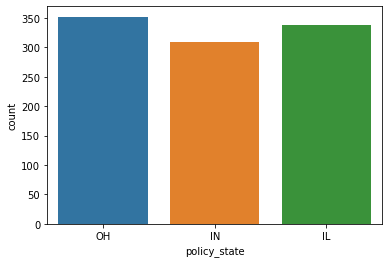

In [41]:
ax=sns.countplot(x='policy_state',data=data_categorical)
print(data_categorical['policy_state'].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


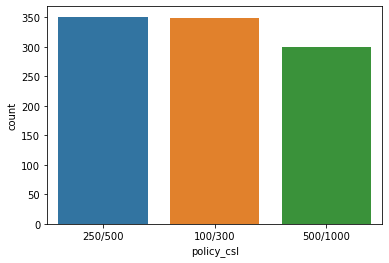

In [42]:
ax=sns.countplot(x='policy_csl',data=data_categorical)
print(data_categorical['policy_csl'].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


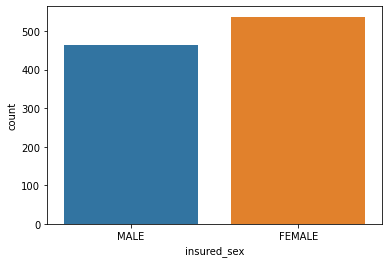

In [43]:
ax=sns.countplot(x='insured_sex',data=data_categorical)
print(data_categorical['insured_sex'].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


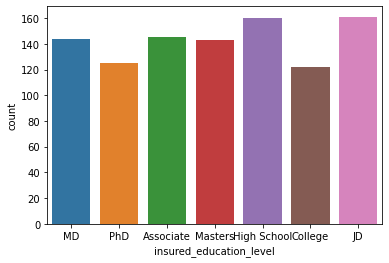

In [44]:
ax=sns.countplot(x='insured_education_level',data=data_categorical)
print(data_categorical['insured_education_level'].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


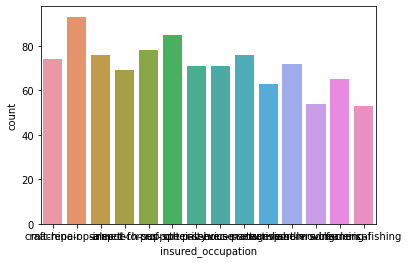

In [45]:
ax=sns.countplot(x='insured_occupation',data=data_categorical)
print(data_categorical['insured_occupation'].value_counts())

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


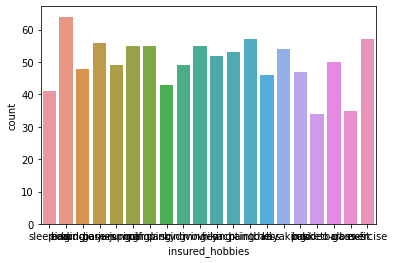

In [46]:
ax=sns.countplot(x='insured_hobbies',data=data_categorical)
print(data_categorical['insured_hobbies'].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


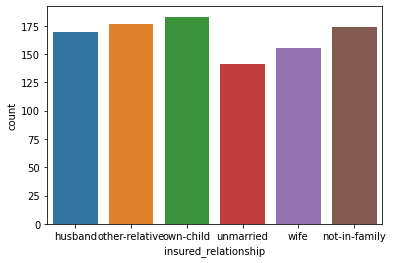

In [47]:
ax=sns.countplot(x='insured_relationship',data=data_categorical)
print(data_categorical['insured_relationship'].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


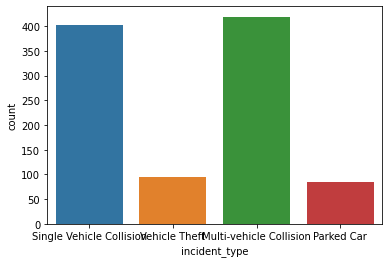

In [49]:
ax=sns.countplot(x='incident_type',data=data_categorical)
print(data_categorical['incident_type'].value_counts())

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


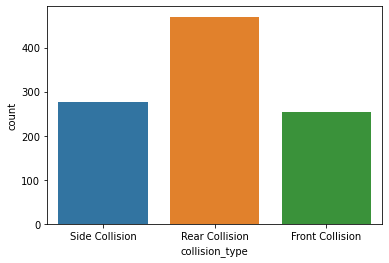

In [50]:
ax=sns.countplot(x='collision_type',data=data_categorical)
print(data_categorical['collision_type'].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


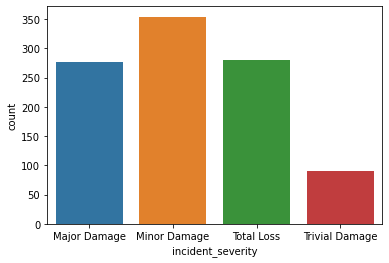

In [51]:
ax=sns.countplot(x='incident_severity',data=data_categorical)
print(data_categorical['incident_severity'].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


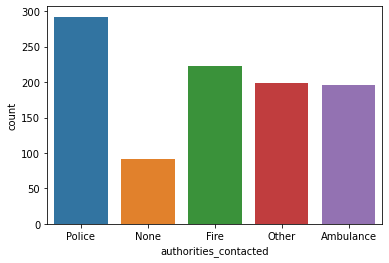

In [52]:
ax=sns.countplot(x='authorities_contacted',data=data_categorical)
print(data_categorical['authorities_contacted'].value_counts())

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


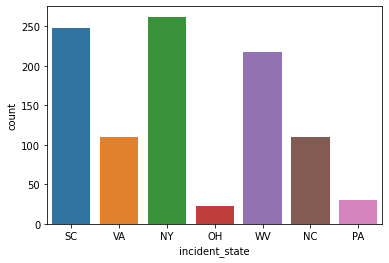

In [53]:
ax=sns.countplot(x='incident_state',data=data_categorical)
print(data_categorical['incident_state'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


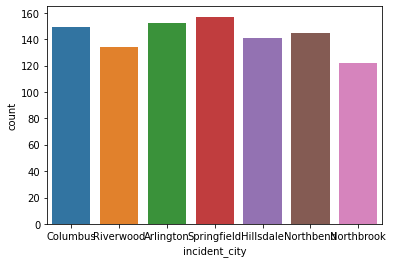

In [54]:
ax=sns.countplot(x='incident_city',data=data_categorical)
print(data_categorical['incident_city'].value_counts())

NO     698
YES    302
Name: property_damage, dtype: int64


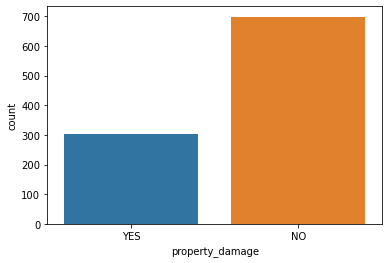

In [56]:
ax=sns.countplot(x='property_damage',data=data_categorical)
print(data_categorical['property_damage'].value_counts())

NO     686
YES    314
Name: police_report_available, dtype: int64


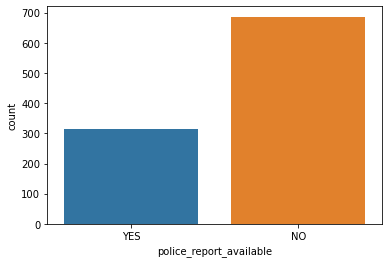

In [57]:
ax=sns.countplot(x='police_report_available',data=data_categorical)
print(data_categorical['police_report_available'].value_counts())

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


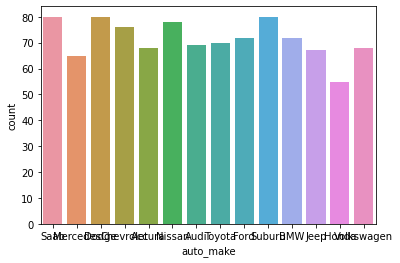

In [58]:
ax=sns.countplot(x='auto_make',data=data_categorical)
print(data_categorical['auto_make'].value_counts())

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Forrestor         28
Camry             28
92x               28
95                27
E400              27
F150              27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
TL                20
Corolla           20
CRV               20
Impreza           20
ML350             20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


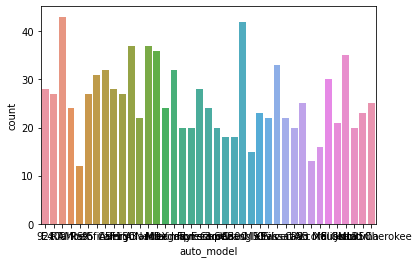

In [59]:
ax=sns.countplot(x='auto_model',data=data_categorical)
print(data_categorical['auto_model'].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


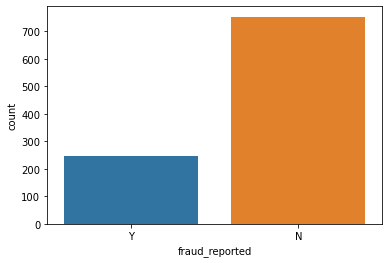

In [60]:
ax=sns.countplot(x='fraud_reported',data=data_categorical)
print(data_categorical['fraud_reported'].value_counts())

### Checking the distribution of the continuous data

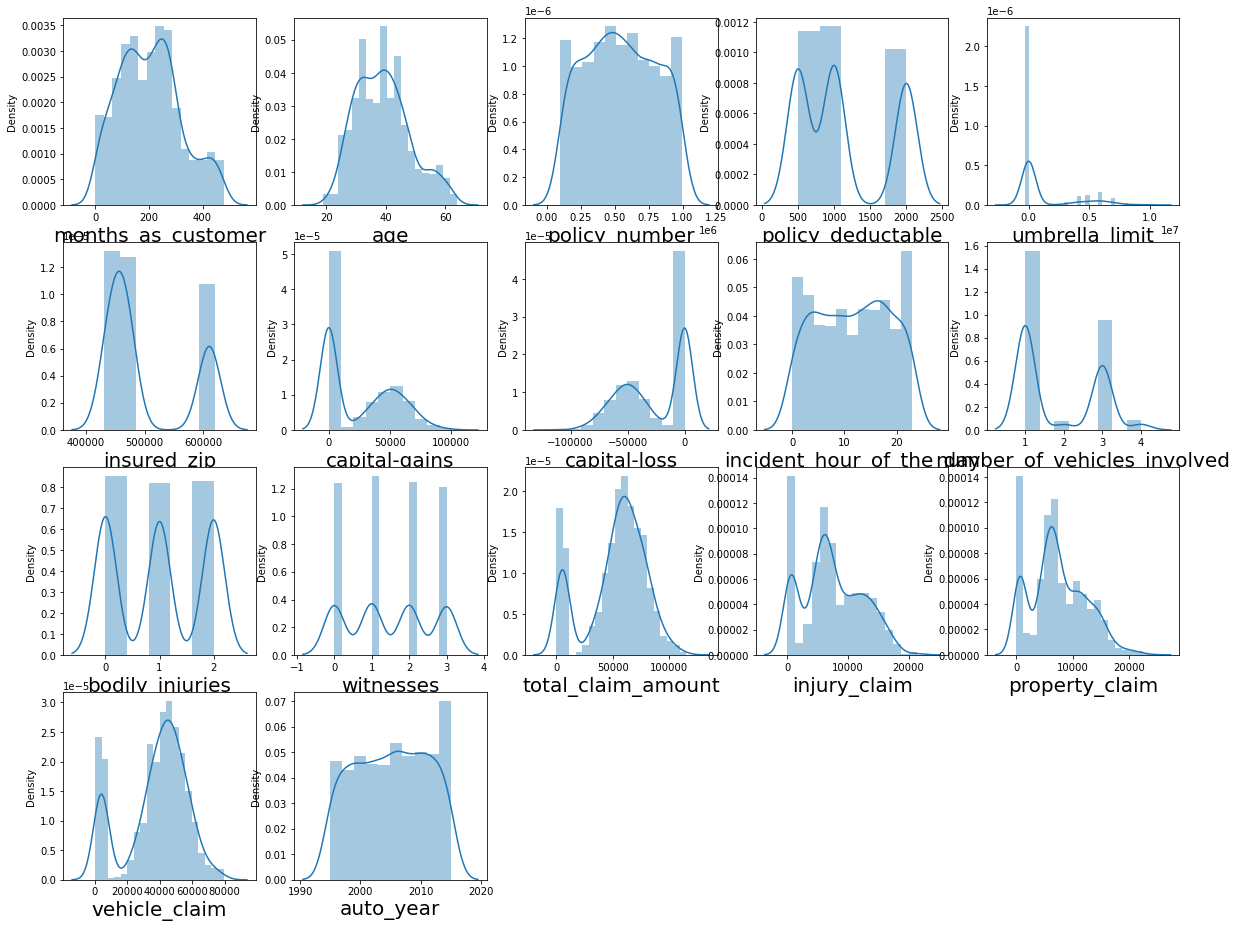

In [64]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_continuous:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [65]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [66]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


### Checking the correlation

In [67]:
data.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_number                 -0.029443
policy_bind_date               0.060642
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_date                 -0.047726
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832


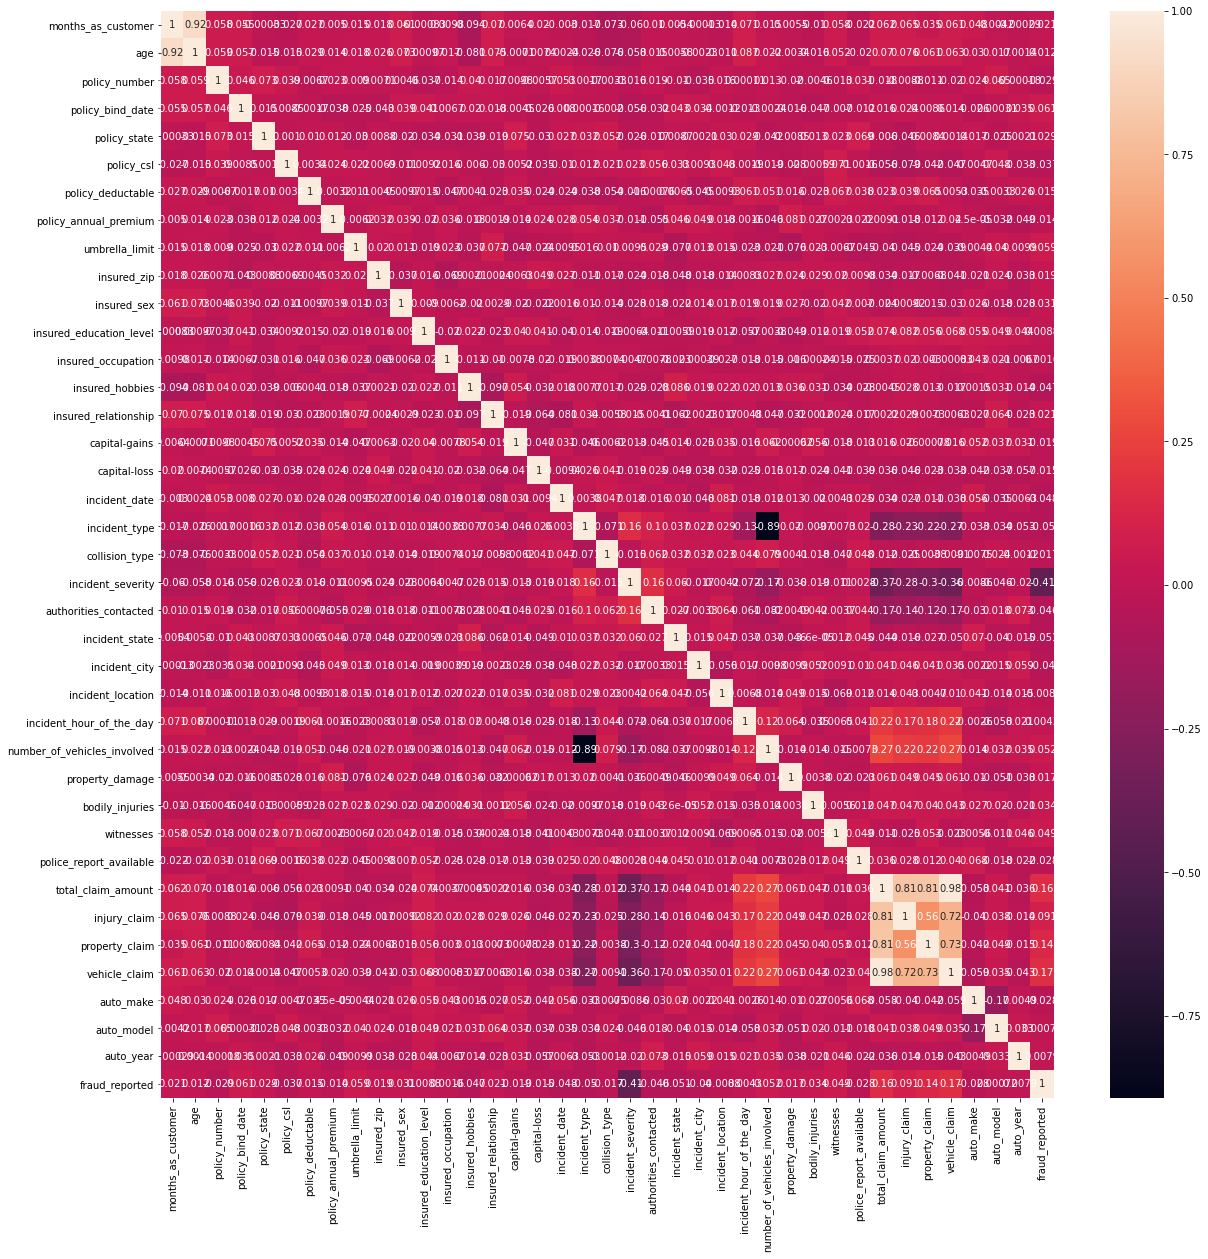

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Dropping columns which has very less relationship with the target variable

In [71]:
data_new=data.drop(columns=['age','months_as_customer','policy_deductable','policy_annual_premium','insured_zip','insured_education_level','insured_occupation','capital-gains','capital-loss','collision_type','incident_location','incident_hour_of_the_day','property_damage','auto_model','auto_year','months_as_customer','policy_number','policy_state','insured_relationship','police_report_available','auto_make',''])

In [72]:
data_new

,policy_bind_date,policy_csl,umbrella_limit,insured_sex,insured_hobbies,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,532,1,0,1,17,49,2,0,4,4,1,1,1,2,71610,6510,13020,52080,1
1,821,1,5000000,1,15,41,3,1,4,5,5,1,0,0,5070,780,780,3510,1
2,186,0,5000000,0,2,44,0,1,4,1,1,3,2,3,34650,7700,3850,23100,0
3,766,1,6000000,0,2,19,2,0,4,2,0,1,1,2,63400,6340,6340,50720,1
4,181,2,6000000,1,2,34,3,1,2,1,0,1,0,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,487,2,0,0,13,44,2,1,1,0,4,1,0,1,87200,17440,8720,61040,0
996,129,0,0,0,17,47,2,0,1,4,3,1,2,3,108480,18080,18080,72320,0
997,509,1,3000000,0,3,45,0,1,4,0,0,3,2,3,67500,7500,7500,52500,0
998,573,2,5000000,1,0,52,2,0,3,1,0,1,0,1,46980,5220,5220,36540,0


### Checking for outliers using boxplot

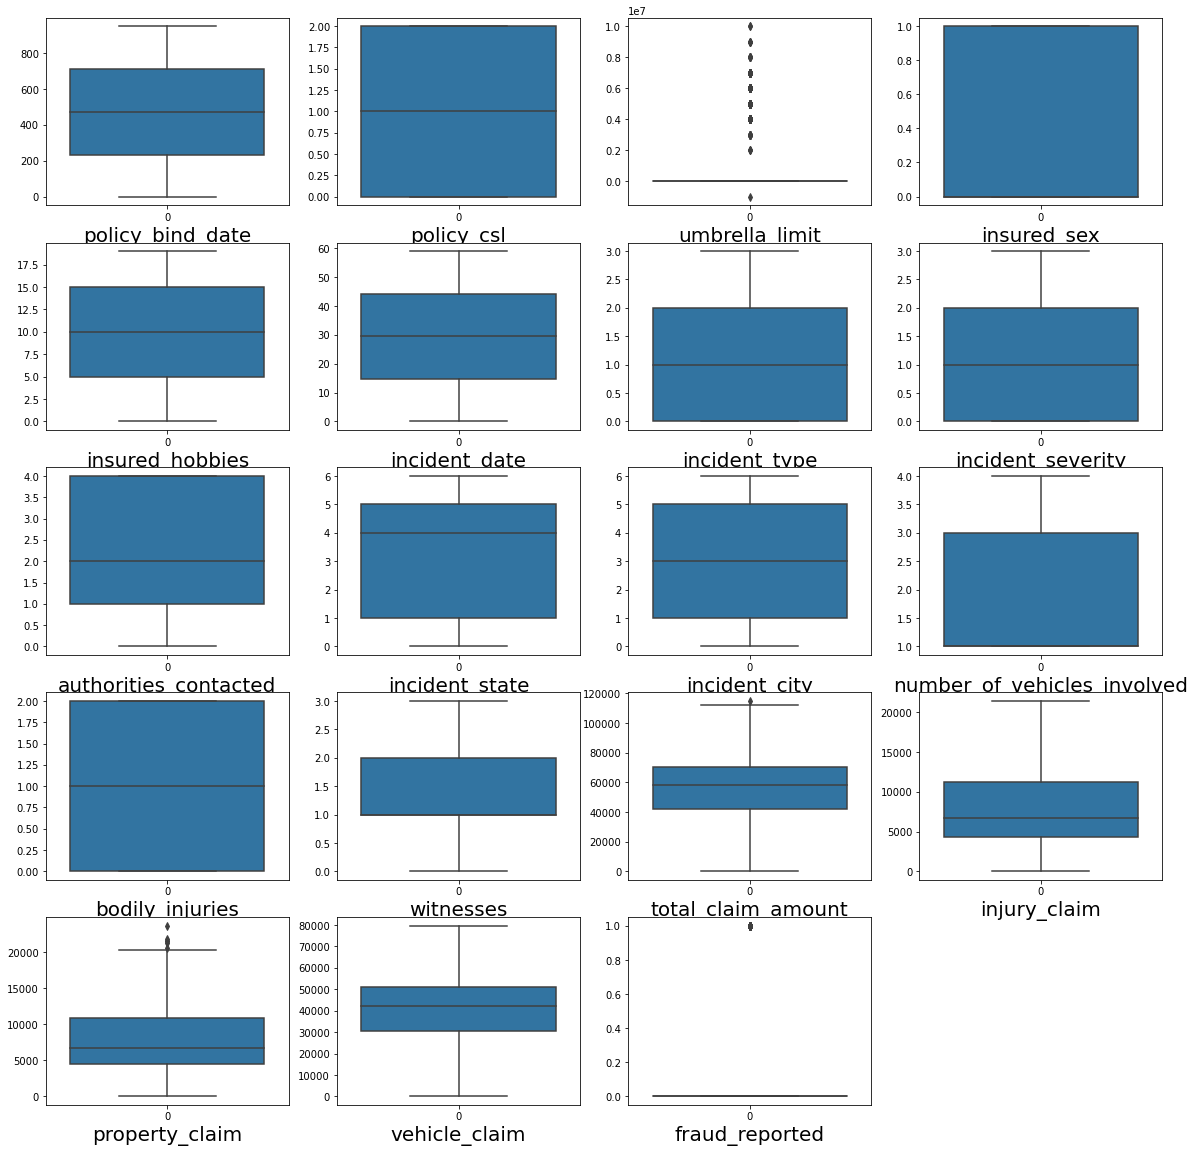

In [73]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since these are the possible outcomes

### Dividing the Dataset into dependent and independent variable

In [74]:
x=data_new.drop(columns='fraud_reported')
y=data_new['fraud_reported']

In [75]:
x

,policy_bind_date,policy_csl,umbrella_limit,insured_sex,insured_hobbies,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,532,1,0,1,17,49,2,0,4,4,1,1,1,2,71610,6510,13020,52080
1,821,1,5000000,1,15,41,3,1,4,5,5,1,0,0,5070,780,780,3510
2,186,0,5000000,0,2,44,0,1,4,1,1,3,2,3,34650,7700,3850,23100
3,766,1,6000000,0,2,19,2,0,4,2,0,1,1,2,63400,6340,6340,50720
4,181,2,6000000,1,2,34,3,1,2,1,0,1,0,1,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,487,2,0,0,13,44,2,1,1,0,4,1,0,1,87200,17440,8720,61040
996,129,0,0,0,17,47,2,0,1,4,3,1,2,3,108480,18080,18080,72320
997,509,1,3000000,0,3,45,0,1,4,0,0,3,2,3,67500,7500,7500,52500
998,573,2,5000000,1,0,52,2,0,3,1,0,1,0,1,46980,5220,5220,36540


In [76]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

### Checking Skewness

In [77]:
x.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
incident_state                -0.148865
authorities_contacted         -0.121744
insured_hobbies               -0.061563
incident_date                  0.004756
policy_bind_date               0.005194
bodily_injuries                0.014777
witnesses                      0.019636
incident_city                  0.049531
policy_csl                     0.088928
incident_type                  0.101507
insured_sex                    0.148630
injury_claim                   0.264811
incident_severity              0.279016
property_claim                 0.378169
number_of_vehicles_involved    0.502664
umbrella_limit                 1.806712
dtype: float64

### Transform data to remove skewness

In [78]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [79]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.29555361,  0.17884614, -0.34911287, ...,  0.00576218,
         1.08179312,  0.75369677],
       [ 1.18293655,  0.17884614,  1.35781686, ..., -1.52534734,
        -1.55739143, -1.7866293 ],
       [-1.00500009, -1.23759599,  1.35781686, ...,  0.22383325,
        -0.57750678, -0.82088123],
       ...,
       [ 0.21941272,  0.17884614,  0.75650937, ...,  0.1882669 ,
         0.18609503,  0.77723183],
       [ 0.42889669,  1.23048668,  1.35781686, ..., -0.25135345,
        -0.26501162, -0.10425834],
       [-0.30581497,  0.17884614, -0.34911287, ..., -1.69586971,
        -1.49262878, -1.77908726]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [81]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.013120,policy_bind_date
1,1.017718,policy_csl
2,1.017222,umbrella_limit
3,1.015881,insured_sex
4,1.023001,insured_hobbies
5,1.007199,incident_date
6,10.182326,incident_type
7,1.178687,incident_severity
8,1.080304,authorities_contacted
9,1.019535,incident_state


#### Removing columns due to multicollinearity

In [82]:
x=x.drop(columns=['vehicle_claim','incident_type'])

In [83]:
x_new=power_transform(x)

In [84]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.29555361,  0.17884614, -0.34911287, ...,  0.71571428,
         0.00576218,  1.08179312],
       [ 1.18293655,  0.17884614,  1.35781686, ..., -1.77697937,
        -1.52534734, -1.55739143],
       [-1.00500009, -1.23759599,  1.35781686, ..., -0.71682466,
         0.22383325, -0.57750678],
       ...,
       [ 0.21941272,  0.17884614,  0.75650937, ...,  0.55301157,
         0.1882669 ,  0.18609503],
       [ 0.42889669,  1.23048668,  1.35781686, ..., -0.24751968,
        -0.25135345, -0.26501162],
       [-0.30581497,  0.17884614, -0.34911287, ..., -1.77730614,
        -1.69586971, -1.49262878]])

In [85]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.013042,policy_bind_date
1,1.015723,policy_csl
2,1.016067,umbrella_limit
3,1.011718,insured_sex
4,1.016879,insured_hobbies
5,1.006308,incident_date
6,1.162821,incident_severity
7,1.058393,authorities_contacted
8,1.017389,incident_state
9,1.011564,incident_city


### Finding the best random state

In [86]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.856 on Random State  539


### Splitting data Into Training and test data

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=539)

### Logistic Regression

In [88]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

85.6
[[168  33]
 [ 40   9]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       201
           1       0.21      0.18      0.20        49

    accuracy                           0.71       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.69      0.71      0.70       250



### Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  80.80000000000001
[[175  26]
 [ 22  27]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       201
           1       0.51      0.55      0.53        49

    accuracy                           0.81       250
   macro avg       0.70      0.71      0.70       250
weighted avg       0.81      0.81      0.81       250



### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  86.4
[[190  11]
 [ 23  26]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       201
           1       0.70      0.53      0.60        49

    accuracy                           0.86       250
   macro avg       0.80      0.74      0.76       250
weighted avg       0.85      0.86      0.86       250



### SVC

In [91]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  85.2
[[190  11]
 [ 26  23]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       201
           1       0.68      0.47      0.55        49

    accuracy                           0.85       250
   macro avg       0.78      0.71      0.73       250
weighted avg       0.84      0.85      0.84       250



### Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.7969999999999999


In [94]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.781


In [95]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.7969999999999999


In [96]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.797


Random Forest is Performing better among all so we will continue with Random Forest

### Hyper Parameter Tuning

In [97]:
# Creating parameter list for passing in GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion':['gini','entropy'],
            'random_state':list(range(0,10))}

In [98]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) # Fitting the data in the model
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'random_state': 5}

In [99]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.868

#### ROC AUC plot

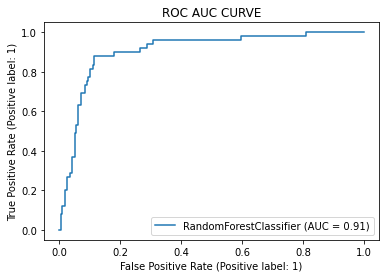

In [100]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

#### Saving the model in pickel

In [101]:
import pickle
filename='insurance_fraud.pickle'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

## Documentation

In [ ]:
Import the csv file then seen the data we found one column ['_c39'] which has no value and we remove that column from the dataset.
After that we check for null values and no null values present.
After that we check for ? values in the columns and we found some ? values so we dealt with that.
After that we made the seperate DataFrame of the categorical and the continuous data.
Then the vizualization of the categorical and continuous data is done .
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['age','months_as_customer','policy_deductable','policy_annual_premium','insured_zip','insured_education_level','insured_occupation','capital-gains','capital-loss','collision_type','incident_location','incident_hour_of_the_day','property_damage','auto_model','auto_year','months_as_customer','policy_number','policy_state','insured_relationship','police_report_available','auto_make',''] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and some outliers found but we did not remove them since these are the possible outcomes.
After that we divide the dataset in dependent and independent variables.
After that we check for skewness and some skewness is found in the columns and we remove it by power transform .
After scaling the data we checked for multicollinearity and multicollinearity is found between columns so we remove columns ['vehicle_claim','incident_type'].
After that we trained the model with several algorithms and Random forest regressor as the best algo for classification problem.
Hyperparameter tuning is done.
In the last we saved the model.